<a href="https://colab.research.google.com/github/ishancoderr/AWS_MLS_C01/blob/model-perfomence/Model_Perfomence_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression!!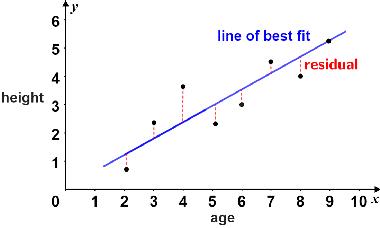

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df_air = pd.read_csv('https://raw.githubusercontent.com/ishancoderr/AWS_MLS_C01/cc570a645a026bf5bfdbf147c9f956f1824e0401/airpassengers.csv',index_col=0)

**bellow model predictions are dummy values**

In [9]:
df_air

,GDP,Population,Passengers,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
Year,,,,,,,
2008,14.72,304.09,701.78,710,701,850,750
2009,14.42,306.77,679.42,650,670,450,750
2010,14.96,309.34,720.50,700,715,1000,750
2011,15.52,311.64,730.80,750,735,550,750
2012,16.16,313.99,736.70,769,740,700,750
2013,16.69,316.23,743.17,800,740,900,750
2014,17.43,318.62,762.71,745,760,1100,750
2015,18.12,321.04,798.22,780,790,1200,750
2016,18.62,323.41,824.04,800,825,1500,750


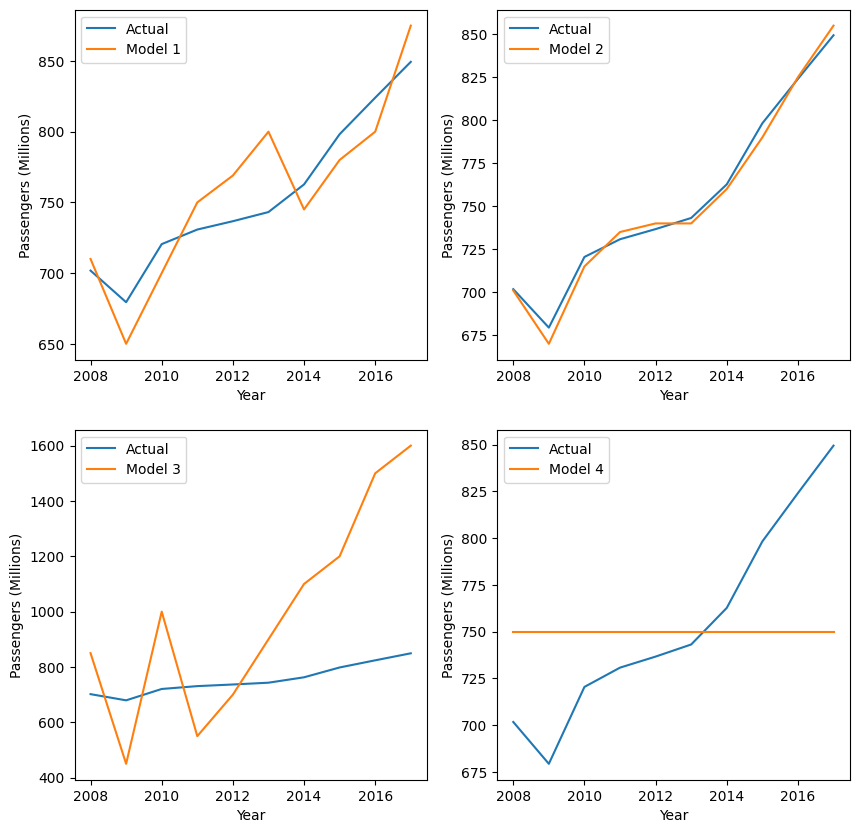

In [10]:
plt.figure(figsize=(10,10))

# Plot Actual versus predictions by each model
# We are going to draw 4 plots in a 2 x 2 grid
# 221 = 2 rows, 2 columns, 1st sub plot
# 222 = 2 rows, 2 columns, 2nd sub plot
# and so forth

# Model 1
plt.subplot(221)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model1_Prediction'],label='Model 1')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 2
plt.subplot(222)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model2_Prediction'],label='Model 2')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 3
plt.subplot(223)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model3_Prediction'],label='Model 3')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 4
plt.subplot(224)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model4_Prediction'],label='Model 4')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

plt.show()

# **compare RMSE with above data **

In [11]:
# RMSE
for model in models:
    print (model)
    mse = mean_squared_error(df_air['Passengers'],
                             df_air[model.replace(' ','') + '_Prediction'])
    print(" Mean Squared Error: {0:.2f}".format(mse))
    print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

Model 1
 Mean Squared Error: 787.38
 Root Mean Square Error: 28.06
Model 2
 Mean Squared Error: 26.54
 Root Mean Square Error: 5.15
Model 3
 Mean Squared Error: 150686.81
 Root Mean Square Error: 388.18
Model 4
 Mean Squared Error: 2661.81
 Root Mean Square Error: 51.59


# *Residual Histograms*

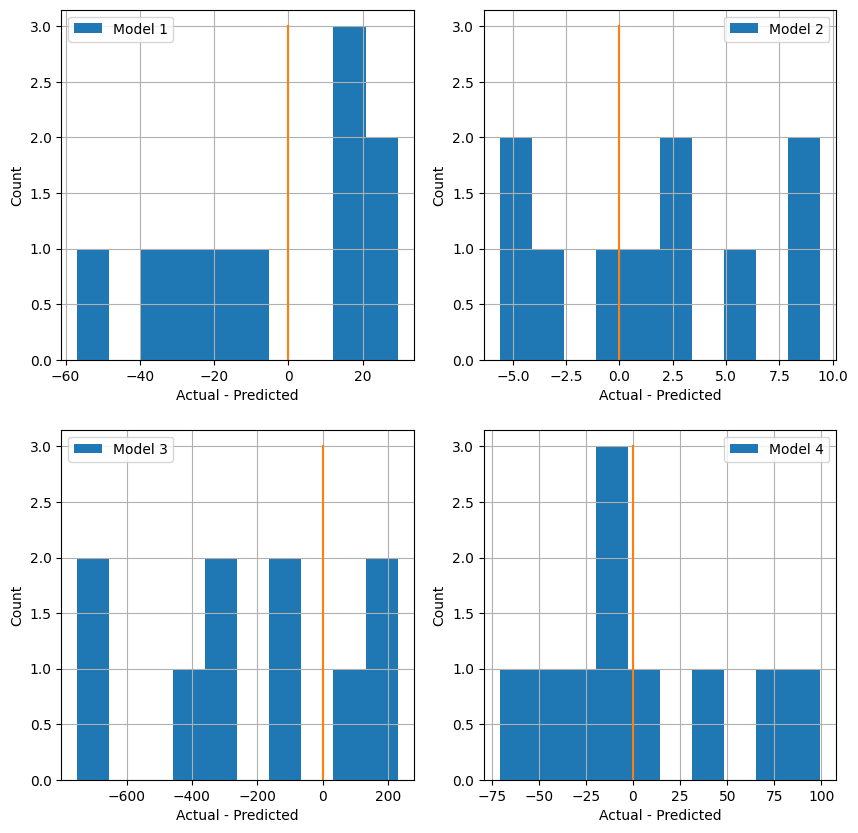

In [12]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    residual = df_air['Passengers'] - df_air[model.replace(' ','') + '_Prediction']

    plt.hist(residual,
             label=model)
    plt.plot([0,0],[0,3])
    plt.xlabel('Actual - Predicted')
    plt.ylabel('Count')
    plt.grid()
    plt.legend()

visual observation using plots and by comparing RMSE metrics/residuals you can get a idea about model perfomance

# **Binary Classifier**

In [24]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df = pd.read_csv('https://raw.githubusercontent.com/ishancoderr/AWS_MLS_C01/model-perfomence/examEvaluations.csv')

In [25]:
df.head()

,Hours,Pass,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
0,0.50,0,0.12,0.22,0.01,0.53
1,0.75,0,0.23,0.27,0.09,0.51
2,1.00,0,0.31,0.28,0.13,0.96
3,1.25,0,0.35,0.17,0.15,0.75
4,1.50,0,0.42,0.42,0.20,0.50


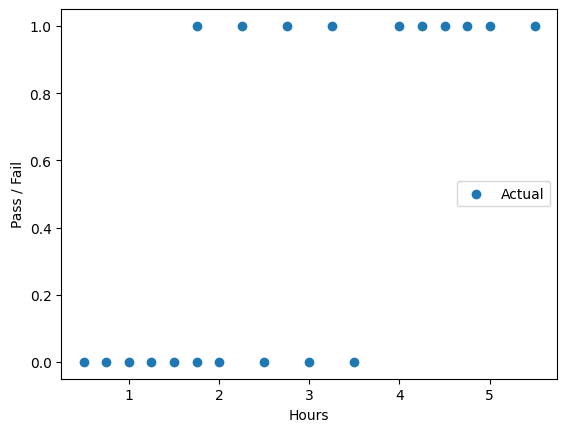

In [26]:
plt.figure()
plt.scatter(df['Hours'],df['Pass'],label='Actual')
plt.legend(loc=7)
plt.xlabel('Hours')
plt.ylabel('Pass / Fail')
plt.show()

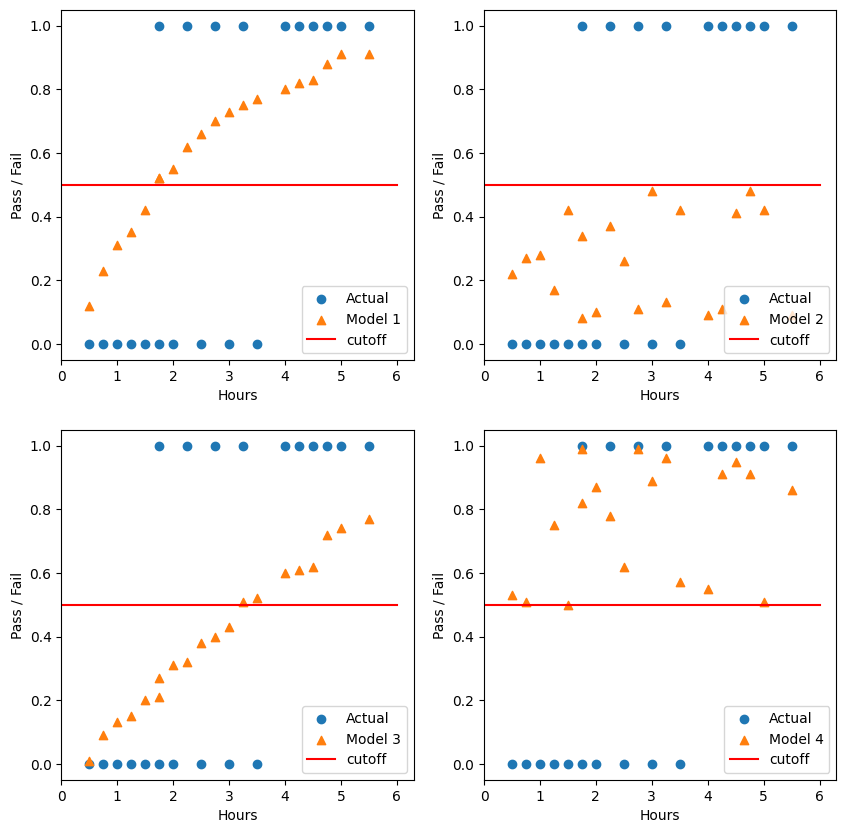

In [27]:
# Compare performance of Actual and Model 1 Prediction
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)

    plt.scatter(df['Hours'],df['Pass'],label='Actual')
    plt.scatter(df['Hours'],df[model.replace(' ','') + '_Prediction'],
                label=model,marker='^')
    plt.plot([0,6],[0.5,0.5],color='r',label='cutoff')
    plt.xlim(left=0)
    plt.legend(loc=4)
    plt.xlabel('Hours')
    plt.ylabel('Pass / Fail')



*   **Model 2** assigned score crosses cut-off threshold of 0.5 at around 1.5 hours of study time
*   **Model 3** assigned score crosses cut-off threshold of 0.5 at around 3 hours of study time
* Other two modles are byers






# *Confusion Metrix*

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Compute confusion matrix
#cnf_matrix = confusion_matrix(df['Pass'],df['Model1_Prediction'],labels=[1,0])

**True Positive Rate**

𝑇𝑃𝑅 =
𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒/
(𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒+𝐹𝑎𝑙𝑠𝑒 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒)


likewise we can calculate **True Negative Rate**,**False Positive Rate**,**False Negative Rate**,**True Negative Rate**



**Terminology Description**

Positive- Total Actual Positives = True Positive + False Negative

Negative- Total Actual Negatives = True Negative + False Positive

True Positive- How many samples were correctly classified as Positive

True Negative- How many samples were correctly classified as Negative

False Negative- How many positive samples were mis-classified as
negative

False Positive - How many negative samples were mis-classified as
positive

# Precision

Fraction of true positives among all predicted positives. Larger
value indicates better predictive accuracy

𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 =
𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒/
(𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒+𝐹𝑎𝑙𝑠𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒)

Good model has precision closer to 1. Poor model has
precision closer to 0

# Accuracy
Fraction of correct predictions. Larger value indicates
better predictive accuracy

𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦 =
𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒+𝑇𝑟𝑢𝑒 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒/
(𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒+𝐹𝑎𝑙𝑠𝑒 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒+𝐹𝑎𝑙𝑠𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒+𝑇𝑟𝑢𝑒𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒)

Good model has accuracy closer to 1

# F1 Score

Harmonic Mean of Precision and Recall

𝐹1 𝑆𝑐𝑜𝑟𝑒 =
(2 ∗𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 ∗𝑅𝑒𝑐𝑎𝑙𝑙)/
(𝑃𝑟𝑒𝑐𝑠𝑖𝑜𝑛+𝑅𝑒𝑐𝑎𝑙𝑙)

Good model has F1 score closer to 1

# Area Under Curve Metrics

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
print ('AUC Score')
for model in models:
    roc_score = roc_auc_score(df['Pass'], df[model.replace(' ','') + '_Prediction'])
    print(' {0}: {1:.3f}'.format(model,roc_score))

AUC Score
 Model 1: 0.895
 Model 2: 0.465
 Model 3: 0.900
 Model 4: 0.740
